<a href="https://colab.research.google.com/github/SantiDrelewicz/Aprendizaje-Automatico/blob/main/AA-II/notebooks/notebook_09_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neuronales

Vamos nuevamente a trabajar con los datos de `iris` para entrenar (y antes construir) una Red Neuronal.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

def get_data():
    dataset = load_iris()
    X = dataset["data"]
    y = dataset["target"]
    y = LabelEncoder().fit_transform(y)
    return np.array(X), np.array(y)

X, y = get_data()

La propuesta es empezar por el esqueleto de las 2 clases que usaremos para esta tarea e ir implementado los métodos a medida que avancemos.

Al final de este notebook se encuentran ambas clases completas. Pueden copiar el código desde allí mismo o implementarlo. La idea es que en cada avance podamos comprender la parte del proceso que estamos realizando, por lo cual se recomienda seguir la guia propuesta e ir completando sólo lo que es necesario para cada punto.

In [ ]:
class Capa:
    def __init__(self, neuronas):
        self.neuronas = neuronas

    def forward(self, inputs, weights, bias, activation):
        """
        Forward Propagation de la capa
        """
        raise NotImplementedError

    def relu(self, inputs):
        """
        ReLU: función de activación
        """
        raise NotImplementedError

    def softmax(self, inputs):
        """
        Softmax: función de activación
        """
        raise NotImplementedError

    def backward(self, dA_curr, W_curr, Z_curr, A_prev, activation):
        """
        Backward Propagation de la capa
        """
        raise NotImplementedError

    def relu_derivative(self, dA, Z):
        """
        ReLU: gradiente de ReLU
        """
        raise NotImplementedError

In [ ]:
class RedNeuronal:
    def __init__(self, learning_rate=0.01):
        self.red = [] ## capas
        self.arquitectura = [] ## mapeo de entradas -> salidas
        self.pesos = [] ## W, b
        self.memoria = [] ## Z, A
        self.gradientes = [] ## dW, db
        self.lr = learning_rate

    def add(self, capa):
        """
        Agregar capa a la red
        """
        self.network.append(capa)

    def _compile(self, data):
        """
        Inicializar la arquitectura
        """
        raise NotImplementedError

    def _init_weights(self, data):
        """
        Inicializar arquitectura y los pesos
        """
        raise NotImplementedError

    def _forwardprop(self, data):
        """
        Pasada forward completa por la red
        """
        raise NotImplementedError

    def _backprop(self, predicted, actual):
        """
        Pasada backward completa por la red
        """
        raise NotImplementedError

    def _update(self):
        """
        Actualizar el modelo --> lr * gradiente
        """
        raise NotImplementedError

    def _get_accuracy(self, predicted, actual):
        """
        Calcular accuracy después de cada iteración
        """
        raise NotImplementedError

    def _calculate_loss(self, predicted, actual):
        """
        Calcular cross-entropy loss después de cada iteración
        """
        raise NotImplementedError

    def train(self, X_train, y_train, epochs):
        """
        Entrenar el modelo Stochastic Gradient Descent
        """
        raise NotImplementedError

Los items que se presentan a continuación tienen como objetivo explorar las clases que componen la red neuronal propuesta, comprender su arquitectura y funcionamiento.

Nuevamente, lo ideal es no mirar todos los métodos hasta que llegue el momento de utilizarlos.

1. Crear una Red Neuronal con 6 nodos en la primera capa, 8 en la segunda, 10 en la tercer y finalmente 3 en la última, utilizando los métodos `add()`, `_compile()` de la clase `RedNeuronal` y el constructor de la clase `Capa`.
  
    Imprimir la arquitectura del modelo y asegurarse de obtener:

    ```
    [{'input_dim': 4, 'output_dim': 6, 'activation': 'relu'},
    {'input_dim': 6, 'output_dim': 8, 'activation': 'relu'},
    {'input_dim': 8, 'output_dim': 10, 'activation': 'relu'},
    {'input_dim': 10, 'output_dim': 3, 'activation': 'softmax'}]
    ```

    Dibujar la red en papel.

1. Inicializar los pesos de la red del punto anterior (`_init_weights(datos)`) y verificar que los pesos tienen dimensión correcta:

    ```
    capa 0: w=(4, 6) - b=(1, 6)
    capa 1: w=(6, 8) - b=(1, 8)
    capa 2: w=(8, 10) - b=(1, 10)
    capa 3: w=(10, 3) - b=(1, 3)
    ```

    Definir las matrices que se corresponden con las capas de manera que una pasada pueda ser interpretada como el producto de todas ellas. Recordar que en cada paso por cada capa estaremos computando por cada neurona de la capa siguiente:

    $$Z = \sum_{i=1}^{n} X_i \times W_i + b$$

1. Funciones de activación de una `Capa`:
    1. Verificar que el funcionamiento de `ReLU` se corresponda con:

        ```
        if input > 0:
            return input
        else:
            return 0
        ```

    2. Verificar que el funcionamiento de `softmax` se corresponda con:

  $$ \sigma(Z_i) = \frac{e^{z_i}}{\sum_{i=1}^{n} e^{z_j}} $$

  **Nota**: para probar estos dos métodos puede ser util construir un vector de la siguiente manera: `np.array([[1.3, 5.1, -2.2, 0.7, 1.1]])` que genera un vector de tamaño (1,5).

1. Avancemos con `_forwardprop(datos)`, si corremos la red inicializada con los datos:

    1. ¿Qué nos tipo de objeto nos devuelve este método?

    1. ¿Qué quiere decir cada uno de los valores?

    1. La primera fila, que se correspondería con la primera observación del dataset, ¿qué resultados nos da?¿qué es más probable: 'setosa', 'versicolor' o 'virginica'?¿qué valor es el real?¿por qué?

1. Arrancamos a propagar para atrás lo aprendido en la primera pasada. Esto lo realizaremos con el método `_backprop`.

    1. ¿Cómo es la derivada de la función de activación `ReLU`?¿Su código es correcto?

    1. ¿Cuál es la operación matemática que hace la función `backward` de la clase `Capa` en el caso de tener como activación a `relu`?

    1. El método `_backprop` toma 2 parámetros: `predicted` y `actual`. ¿qué debemos pasarle en dicho lugar?

        Si la respuesta no fue: en `predicted` le pasamos el resultado de `_forwardprop(...)` y en `actual` le pasamos `y`.... volver a pensarlo. ;-)

    1. Verificar que los `gradientes` y los `pesos` para cada una de las capas tienen el mismo tamaño.

1. Preparemos por último las funciones necesarias para el entrenamiento. Describir brevemente qué hacen las funciones:

    - `_get_accuracy`
    - `_calculate_loss`
    - `_update`

1. Incluyamos finalmente la función `train` y entrenemos una red con la arquitectura propuesta en el punto 1 por 200 epocas.

    1. ¿Qué valores se imprimen?¿Qué es posible interpretar de ellos?

    1. Graficar el _accuracy_ y la _loss_ que arroja el entramiento en función de las _epochs_. ¿Qué se puede concluir? Probablemente la señal sea ruidosa, por lo que se recomienda hacer un suavizado por ventanas deslizantes.

1. Reimplementar la clase `RedNeuronal` utilizando PyTorch

    Hasta ahora hemos construido nuestra propia red neuronal "desde cero", lo cual nos permitió comprender en profundidad cómo funciona cada componente: inicialización de pesos, funciones de activación, forward y backward propagation, cálculo de loss y accuracy, y actualización de pesos.

    Sin embargo, en proyectos reales y más complejos, utilizamos frameworks como **PyTorch** que abstraen estas tareas, permitiéndonos enfocarnos más en el diseño de la arquitectura y el análisis de los resultados.  

    **Objetivo de este inciso**: recrear la arquitectura y entrenamiento de nuestra red neuronal, pero usando herramientas provistas por PyTorch. Esto implica:

    1. Implementar una clase `RedNeuronalTorch` que herede de `nn.Module` y contenga una red con la misma arquitectura:  
    - Entrada de dimensión 4 (por las características del dataset Iris)
    - Capas ocultas de 6, 8 y 10 nodos respectivamente
    - Capa de salida con 3 nodos y activación `softmax`

    2. Entrenar esta nueva red por 200 épocas utilizando:
    - Función de pérdida: `nn.CrossEntropyLoss`
    - Optimizador: `torch.optim.SGD`
    - Tasa de aprendizaje: 0.01

    3. Comparar los resultados obtenidos con los del entrenamiento anterior (implementación manual). Algunas preguntas a responder:
    - ¿La convergencia es más rápida o más lenta?
    - ¿Cómo se comporta la pérdida durante el entrenamiento?
    - ¿Cuál implementación fue más fácil de modificar o extender?

    4. Graficar la evolución de la **pérdida** y el **accuracy** durante las épocas para ambas implementaciones (manual y PyTorch), idealmente en la misma figura para facilitar la comparación. Podés aplicar una media móvil para suavizar la señal.

    > 💡 **Sugerencia pedagógica**: antes de realizar este inciso, se recomienda repasar los notebooks `9a` y `9b`, donde se presentan una introducción a los tensores y al workflow de ML usando PyTorch.


Crédito: este ejercicio se base en la propuesta de Joe Sasson publicada en [Towards Data Science](https://towardsdatascience.com/coding-a-neural-network-from-scratch-in-numpy-31f04e4d605).

### Código completo (Implementación con Numpy)


In [5]:
class Capa:
    def __init__(self, neuronas):
        self.neuronas = neuronas

    def forward(self, inputs, weights, bias, activation):
        """
        Forward Propagation de la capa
        """
        Z_curr = np.dot(inputs, weights.T) + bias
        if activation == 'relu':
            A_curr = self.relu(inputs=Z_curr)
        elif activation == 'softmax':
            A_curr = self.softmax(inputs=Z_curr)
        return A_curr, Z_curr

    def relu(self, inputs):
        """
        ReLU: función de activación
        """
        return np.maximum(0, inputs)

    def softmax(self, inputs):
        """
        Softmax: función de activación
        """
        exp_scores = np.exp(inputs)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return probs

    def backward(self, dA_curr, W_curr, Z_curr, A_prev, activation):
        """
        Backward Propagation de la capa
        """
        if activation == 'softmax':
            dW = np.dot(A_prev.T, dA_curr)
            db = np.sum(dA_curr, axis=0, keepdims=True)
            dA = np.dot(dA_curr, W_curr)
        else:
            dZ = self.relu_derivative(dA_curr, Z_curr)
            dW = np.dot(A_prev.T, dZ)
            db = np.sum(dZ, axis=0, keepdims=True)
            dA = np.dot(dZ, W_curr)

        return dA, dW, db

    def relu_derivative(self, dA, Z):
        """
        ReLU: gradiente de ReLU
        """
        dZ = np.array(dA, copy = True)
        dZ[Z <= 0] = 0
        return dZ


In [6]:
class RedNeuronal:
    def __init__(self, learning_rate: float = 0.01, seed: int | None = None):
        self.red = [] ## capas
        self.arquitectura = [] ## mapeo de entradas -> salidas
        self.pesos = [] ## W, b
        self.memoria = [] ## Z, A
        self.gradientes = [] ## dW, db
        self.lr = learning_rate
        self.seed = seed

    def add(self, capa):
        """
        Agregar capa a la red
        """
        self.red.append(capa)

    def _compile(self, data):
        """
        Inicializar la arquitectura
        """
        for idx, _ in enumerate(self.red):
            if idx == 0:
                self.arquitectura.append({'input_dim': data.shape[1],
                                          'output_dim': self.red[idx].neuronas,
                                          'activation':'relu'})
            elif idx > 0 and idx < len(self.red)-1:
                self.arquitectura.append({'input_dim': self.red[idx-1].neuronas,
                                          'output_dim': self.red[idx].neuronas,
                                          'activation':'relu'})
            else:
                self.arquitectura.append({'input_dim': self.red[idx-1].neuronas,
                                          'output_dim': self.red[idx].neuronas,
                                          'activation':'softmax'})
        return self

    def _init_weights(self, data):
        """
        Inicializar arquitectura y los pesos
        """
        self._compile(data)

        rng = np.random.default_rng(seed=self.seed)

        for i in range(len(self.arquitectura)):
            self.pesos.append({
                'W': rng.uniform(
                        low=-1, high=1,
                        size=(self.arquitectura[i]['input_dim'],
                              self.arquitectura[i]['output_dim'])
                     ),
                'b':np.zeros((1, self.arquitectura[i]['output_dim']))
            })
        return self

    def _forwardprop(self, data):
        """
        Pasada forward completa por la red
        """
        A_curr = data
        for i in range(len(self.pesos)):
            A_prev = A_curr
            A_curr, Z_curr = self.red[i].forward(
                inputs=A_prev,
                weights=self.pesos[i]['W'].T,
                bias=self.pesos[i]['b'],
                activation=self.arquitectura[i]['activation']
            )
            self.memoria.append({'inputs':A_prev, 'Z':Z_curr})
        return A_curr

    def _backprop(self, predicted, actual):
        """
        Pasada backward completa por la red
        """
        num_samples = len(actual)

        ## compute the gradient on predictions
        dscores = predicted
        dscores[range(num_samples),actual] -= 1
        dscores /= num_samples

        dA_prev = dscores

        for idx, layer in reversed(list(enumerate(self.red))):
            dA_curr = dA_prev

            A_prev = self.memoria[idx]['inputs']
            Z_curr = self.memoria[idx]['Z']
            W_curr = self.pesos[idx]['W']

            activation = self.arquitectura[idx]['activation']

            dA_prev, dW_curr, db_curr = layer.backward(
                dA_curr, W_curr.T, Z_curr, A_prev, activation
            )
            self.gradientes.append({'dW':dW_curr, 'db':db_curr})

        self.gradientes = list(reversed(self.gradientes))  # Reverse the gradients list

    def _update(self):
        """
        Actualizar el modelo --> lr * gradiente
        """
        lr = self.lr
        for idx, layer in enumerate(self.red):
            self.pesos[idx]['W'] -= lr * self.gradientes[idx]['dW']
            self.pesos[idx]['b'] -= lr * self.gradientes[idx]['db']

    def _get_accuracy(self, predicted, actual):
        """
        Calcular accuracy después de cada iteración
        """
        return np.mean(np.argmax(predicted, axis=1)==actual)

    def _calculate_loss(self, predicted, actual):
        """
        Calculate cross-entropy loss after each iteration
        """
        samples = len(actual)

        correct_logprobs = -np.log(predicted[range(samples),actual])
        data_loss = np.sum(correct_logprobs)/samples

        return data_loss

    def train(self, X_train, y_train, epochs):
        """
        Entrenar el modelo Stochastic Gradient Descent
        """
        self.loss = []
        self.accuracy = []

        self._init_weights(X_train)

        for i in range(epochs):
            yhat = self._forwardprop(X_train)

            self.accuracy.append(self._get_accuracy(predicted=yhat, actual=y_train))
            self.loss.append(self._calculate_loss(predicted=yhat, actual=y_train))

            self._backprop(predicted=yhat, actual=y_train)
            self._update()

            if i % 20 == 0:
                s = 'EPOCH: {}, ACCURACY: {}, LOSS: {}'.format(i, self.accuracy[-1], self.loss[-1])
                print(s)

        return (self.accuracy, self.loss)


In [7]:
# Ocultar esta celda
_dataset = load_iris()
model = RedNeuronal()
model.add(Capa(6))
model.add(Capa(8))
model.add(Capa(10))
model.add(Capa(3))

model._init_weights(X)
print(model.arquitectura)

for idx, c in enumerate(model.pesos):
    print(f'capa {idx}: w={c["W"].shape} - b={c["b"].shape}')
# print(len(model.pesos))


out = model._forwardprop(X)
print('SHAPE:', out.shape)
print('Probabilties at idx 0:', out[0])
print('Max', np.argmax(out[0]), _dataset["target_names"][np.argmax(out[0])])
print('Real', _dataset["target"][0], _dataset["target_names"][0])
print('SUM:', sum(out[0]))

model._backprop(predicted=out, actual=y)

print(model.gradientes[0]['dW'].shape, model.pesos[3]['W'].shape)
print(model.gradientes[1]['dW'].shape, model.pesos[2]['W'].shape)
print(model.gradientes[2]['dW'].shape, model.pesos[1]['W'].shape)
print(model.gradientes[3]['dW'].shape, model.pesos[0]['W'].shape)
# c = Capa(4)
# print(np.array([[1.3, 5.1, -2.2, 0.7, 1.1]]).shape)
# print(c.relu(np.array([[1.3, 5.1, -2.2, 0.7, 1.1]])))
# print(c.softmax(np.array([[1.3, 5.1, 2.2, 0.7, 1.1]])))

model = RedNeuronal()
model.add(Capa(6))
model.add(Capa(8))
model.add(Capa(10))
model.add(Capa(3))
epochs = 300
accuracy, loss = model.train(X, y, epochs)


[{'input_dim': 4, 'output_dim': 6, 'activation': 'relu'}, {'input_dim': 6, 'output_dim': 8, 'activation': 'relu'}, {'input_dim': 8, 'output_dim': 10, 'activation': 'relu'}, {'input_dim': 10, 'output_dim': 3, 'activation': 'softmax'}]
capa 0: w=(4, 6) - b=(1, 6)
capa 1: w=(6, 8) - b=(1, 8)
capa 2: w=(8, 10) - b=(1, 10)
capa 3: w=(10, 3) - b=(1, 3)
SHAPE: (150, 3)
Probabilties at idx 0: [0.37507051 0.02825572 0.59667377]
Max 2 virginica
Real 0 setosa
SUM: 1.0
(4, 6) (10, 3)
(6, 8) (8, 10)
(8, 10) (6, 8)
(10, 3) (4, 6)
EPOCH: 0, ACCURACY: 0.3333333333333333, LOSS: 5.989176099303988
EPOCH: 20, ACCURACY: 0.6533333333333333, LOSS: 0.7779718017294666
EPOCH: 40, ACCURACY: 0.6933333333333334, LOSS: 0.6049675786250445
EPOCH: 60, ACCURACY: 0.6733333333333333, LOSS: 0.5717460228432384
EPOCH: 80, ACCURACY: 0.6666666666666666, LOSS: 0.5537136648864959
EPOCH: 100, ACCURACY: 0.6666666666666666, LOSS: 0.5422250529897104
EPOCH: 120, ACCURACY: 0.6666666666666666, LOSS: 0.5340096362457323
EPOCH: 140, ACCU

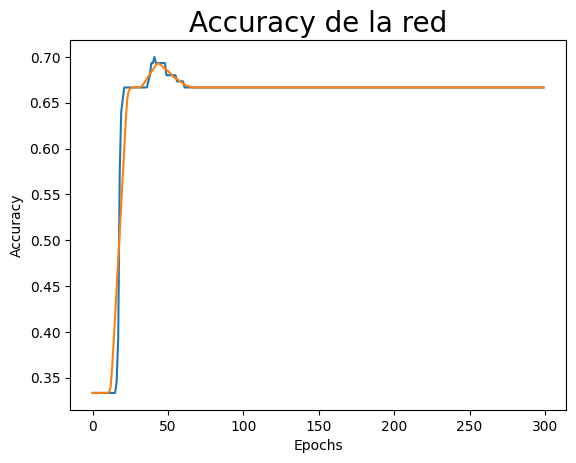

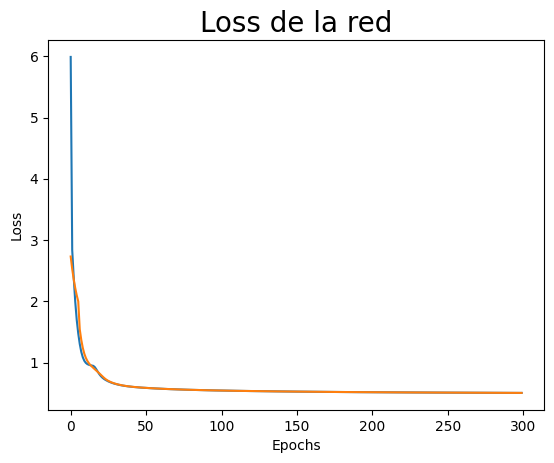

In [8]:
# Esta celda se ocultará

def sliding_window_smooth(data, window_size):
    smoothed_data = []
    half_window = window_size // 2

    for i in range(len(data)):
        window_start = max(0, i - half_window)
        window_end = min(len(data), i + half_window + 1)
        window = data[window_start:window_end]
        smoothed_data.append(np.mean(window))

    return smoothed_data

window_size = 10  # Tamaño de la ventana para suavizar
smoothed_y = sliding_window_smooth(accuracy, window_size)

plt.plot(range(epochs), accuracy)
plt.plot(range(epochs), smoothed_y, label='Datos suavizados')

plt.title('Accuracy de la red', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


plt.plot(range(epochs), loss)
plt.plot(range(epochs), sliding_window_smooth(loss, window_size))
plt.title('Loss de la red', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Epoch 0: Loss = 1.1045, Accuracy = 0.3333
Epoch 20: Loss = 1.0330, Accuracy = 0.6067
Epoch 40: Loss = 0.7770, Accuracy = 0.6467
Epoch 60: Loss = 0.5739, Accuracy = 0.7600
Epoch 80: Loss = 0.4920, Accuracy = 0.8667
Epoch 100: Loss = 0.4168, Accuracy = 0.8933
Epoch 120: Loss = 0.3234, Accuracy = 0.9133
Epoch 140: Loss = 0.2393, Accuracy = 0.9400
Epoch 160: Loss = 0.1712, Accuracy = 0.9667
Epoch 180: Loss = 0.1182, Accuracy = 0.9667


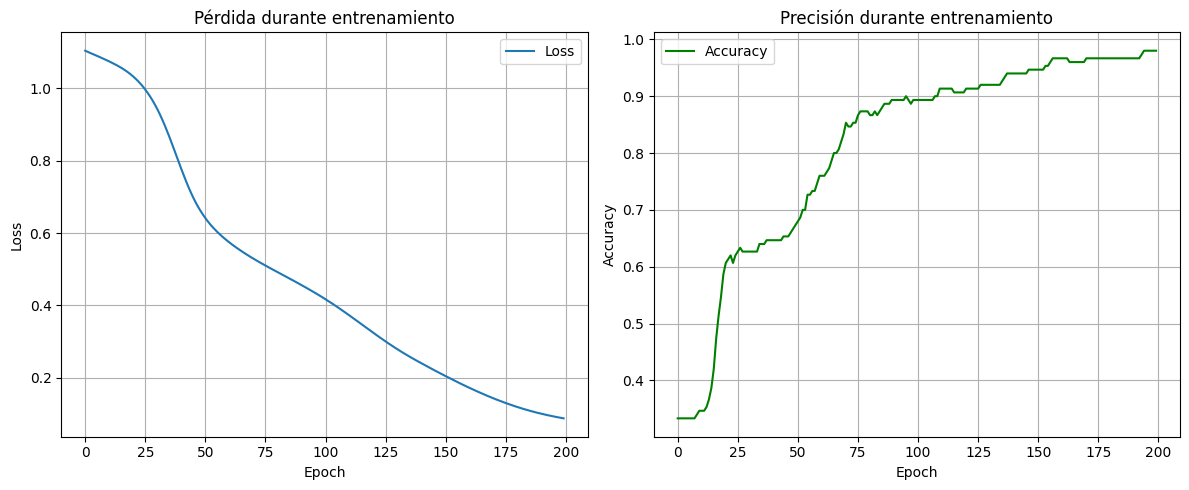

In [9]:
# Esta celda se ocultará

import torch
import torch.nn as nn
from torch.nn.functional import relu
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Cargar y preparar los datos
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_t = torch.tensor(X, dtype=torch.float32)
y_train_t = torch.tensor(y, dtype=torch.long)

# 2. Definir la clase RedNeuronalTorch
class RedNeuronalTorch(nn.Module):
    def __init__(self):
        super(RedNeuronalTorch, self).__init__()
        self.fc1 = nn.Linear(4, 6)
        self.fc2 = nn.Linear(6, 8)
        self.fc3 = nn.Linear(8, 10)
        self.fc4 = nn.Linear(10, 3)

    def forward(self, x):
        x = relu(self.fc1(x))
        x = relu(self.fc2(x))
        x = relu(self.fc3(x))
        x = self.fc4(x)
        return x

# 3. Instanciar modelo, función de pérdida y optimizador
modelo = RedNeuronalTorch()
criterio = nn.CrossEntropyLoss()
optimizador = optim.SGD(modelo.parameters(), lr=0.1)

# 4. Entrenamiento
epochs = 200
loss_hist = []
acc_hist = []

for epoch in range(epochs):
    modelo.train()
    outputs = modelo(X_train_t)
    loss = criterio(outputs, y_train_t)

    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

    # Evaluación
    modelo.eval()
    with torch.no_grad():
        preds = modelo(X_train_t).argmax(dim=1)
        acc = (preds == y_train_t).float().mean().item()

    loss_hist.append(loss.item())
    acc_hist.append(acc)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, Accuracy = {acc:.4f}")

# 5. Graficar resultados
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_hist, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Pérdida durante entrenamiento")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_hist, label="Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Precisión durante entrenamiento")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


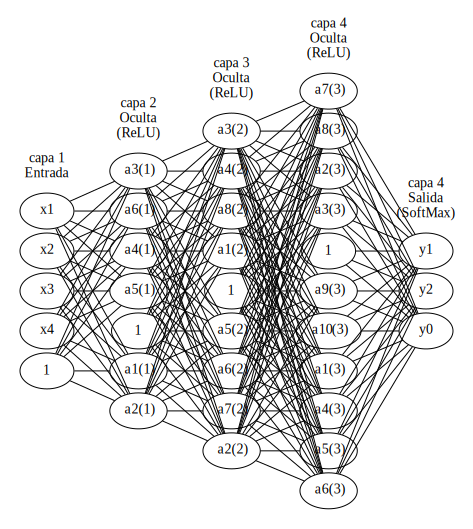

In [10]:
# Esta celda se ocultará

from graphviz import Digraph, Graph

def dibujar_red(red):
    dot = Graph()
    dot.attr(rankdir="LR")
    dot.attr(splines="false")
    dot.attr(nodesep="0.05")

    for idx,capa in enumerate(red.arquitectura):
        with dot.subgraph(name=f'cluster_{idx}') as c:
            c.attr(rank="same")
            for i in range(capa['input_dim']+1):
                c.node(nombre_nodo(idx, i), label=etiqueta_nodo(idx,i))

            c.attr(color='white')

            label_extra = "Entrada" if idx == 0 else "Oculta\n(ReLU)"

            c.attr(label=f'capa {idx+1}\n{label_extra}')

    with dot.subgraph(name=f'cluster_{idx+1}') as c:
            c.attr(rank="same")
            for i in range(capa['output_dim']):
                c.node(nombre_nodo(idx+1, i), label=etiqueta_nodo(idx+1,i, True))

            c.attr(color='white')

            label_extra = "Salida\n(SoftMax)"

            c.attr(label=f'capa {idx+1}\n{label_extra}')

    for idx, capa in enumerate(red.arquitectura):
        for in_idx in range(capa["input_dim"]+1):
            for out_idx in range(capa["output_dim"]):
                to_node = (idx+1, out_idx+1) if idx!=len(red.arquitectura)-1 else (idx+1, out_idx)
                dot.edge(nombre_nodo(idx, in_idx),
                         nombre_nodo(*to_node))

    return dot

def nombre_nodo(capa, indice):
    res = f"c_{capa}_{indice}"
    return res

def etiqueta_nodo(capa, indice, es_final=False):
    if indice==0 and not es_final:
        return "1"
    l = "a" if capa!=0 else "x"
    l = l if not es_final else "y"

    if l=="x" or l=="y":
        return f"<{l}<sub>{indice}</sub>>"
    else:
        return f"<{l}<sub>{indice}</sub><sup>({capa})</sup>>"

# model = RedNeuronal()
# model.add(...)
# model._compile(...datos...)

dibujar_red(model)